# Splitting of Data:

### Description : Method to split dataset into train_data and test_data .
### Refernces : www.towardsdatascience.com
### Link : (https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7) (https://medium.com/@contactsunny/how-to-split-yo)ur-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d)  

## Import Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**About Data set:**
* We have a dataset containing prices of used BMW cars. We are going to analyze this dataset and build a prediction function that can predict a price by taking mileage and age of the car as input. We will use sklearn train_test_split method to split training and testing dataset

In [2]:
# load the data set :
df = pd.read_csv("/home/ritesh/Desktop/md_work/data set/Data_Splitting.csv")
print(df)
df.shape

    Mileage  Age(yrs)  Sell Price($)
0     69000         6          18000
1     35000         3          34000
2     57000         5          26100
3     22500         2          40000
4     46000         4          31500
5     59000         5          26750
6     52000         5          32000
7     72000         6          19300
8     91000         8          12000
9     67000         6          22000
10    83000         7          18700
11    79000         7          19500
12    59000         5          26000
13    58780         4          27500
14    82450         7          19400
15    25400         3          35000
16    28000         2          35500
17    69000         5          19700
18    87600         8          12800
19    52000         5          28200


(20, 3)

**Car Mileage Vs Sell Price ($)**

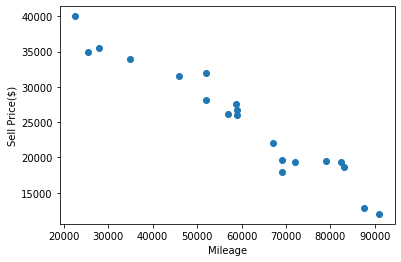

In [3]:
# plotting and checking the relation of two variables:
plt.scatter(df["Mileage"],df["Sell Price($)"])
plt.xlabel("Mileage")
plt.ylabel("Sell Price($)")
plt.show()

# we can say that are linearlly realated to each other.

**Age(yrs) Vs Sell Price ($)** 

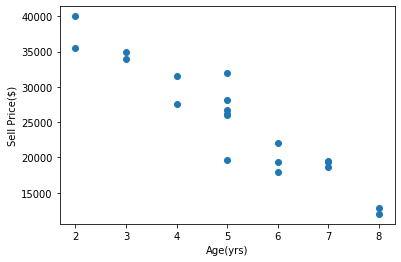

In [4]:
# ploting scatter plot :
plt.scatter(df["Age(yrs)"],df["Sell Price($)"])
plt.xlabel("Age(yrs)")
plt.ylabel("Sell Price($)")
plt.show()

# here we can draw a linear line .

**Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)**

**The approach we are going to use here is to split available data in two sets**
* Training: We will train our model on this dataset
* Testing: We will use this subset to make actual predictions using trained model

**The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.**


In [5]:
# split data into two parts independant and dependant variables :
x = df[['Mileage',"Age(yrs)"]]
x

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [6]:
y = df [["Sell Price($)"]]
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,26750
6,32000
7,19300
8,12000
9,22000


In [7]:
# import sklearn lib to split the data :

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
print(x_train)

# splitting data in to 4 parts x_tarn,x_test,y_tarin,y_test
# test_size = .2(which means we are diving our data in ratio 80:20)
# random_state is the random number generator.
# random_state = 0 (we can also put any number here,if we use 0 it will keep traing data remains unchanged,otherwise it will change it randomaly evry time we press enter)

    Mileage  Age(yrs)
10    83000         7
17    69000         5
6     52000         5
13    58780         4
4     46000         4
2     57000         5
5     59000         5
14    82450         7
9     67000         6
7     72000         6
16    28000         2
11    79000         7
3     22500         2
0     69000         6
15    25400         3
12    59000         5


In [8]:
print(x_test)

    Mileage  Age(yrs)
18    87600         8
1     35000         3
19    52000         5
8     91000         8


In [9]:
print(y_train)

    Sell Price($)
10          18700
17          19700
6           32000
13          27500
4           31500
2           26100
5           26750
14          19400
9           22000
7           19300
16          35500
11          19500
3           40000
0           18000
15          35000
12          26000


In [10]:
print(y_test)

    Sell Price($)
18          12800
1           34000
19          28200
8           12000


**Lets run linear regression model now**

In [11]:
from sklearn.linear_model import LinearRegression
output = LinearRegression()
output.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
x_test

,Mileage,Age(yrs)
18,87600,8
1,35000,3
19,52000,5
8,91000,8


In [13]:
# predicted values after using LinearRegrssion on X_test:
output.predict(x_test)

array([[15968.88975121],
       [34057.45077682],
       [28308.037565  ],
       [14718.28626739]])

In [14]:
y_test

,Sell Price($)
18,12800
1,34000
19,28200
8,12000


In [15]:
# Using score() method here it will take x_train values and predict x_test values and than compare them against y_test and tell you the accuracy. 

output.score(x_test,y_test)

# so here accuracy is 95%.

0.9524414164762771

# Summary :
* Basically you have three data sets: training, validation and testing.You train the classifier using 'training set', tune the parameters using 'validation set' and then test the performance of your classifier on unseen 'test set'. An important point to note is that during training the classifier only the training and/or validation set is available. The test set must not be used during training the classifier. The test set will only be available during testing the classifier.

**Training Dataset**
* The sample of data used to fit the model.The actual dataset that we use to train the model (weights and biases in the case of Neural Network). The model sees and learns from this data.

**Validation Dataset**
* Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.

**Test Dataset**
* Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.The Test dataset provides the gold standard used to evaluate the model. It is only used once a model is completely trained(using the train and validation sets).

## About the dataset split ratio :
* Now how to split your dataset into Train, Validation and Test sets.
* This mainly depends on 2 things. First, the total number of samples in your data and second, on the actual model you are training.

**1)Some models need substantial data to train upon, so in this case you would optimize for the larger training sets. Models with very few hyperparameters will be easy to validate and tune, so you can probably reduce the size of your validation set, but if your model has many hyperparameters, you would want to have a large validation set as well(although you should also consider cross validation). Also, if you happen to have a model with no hyperparameters or ones that cannot be easily tuned, you probably don’t need a validation set.**

**2)There are two more competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.**

**Note on Cross Validation:** 
* Many a times, people first split their dataset into 2 — Train and Test. After this, they keep aside the Test set, and randomly choose X% of their Train dataset to be the actual Train set and the remaining (100-X)% to be the Validation set, where X is a fixed number(say 80%), the model is then iteratively trained and validated on these different sets. There are multiple ways to do this, and is commonly known as Cross Validation. Basically you use your training set to generate multiple splits of the Train and Validation sets. Cross validation avoids over fitting and is getting more and more popular, with K-fold Cross Validation being the most popular method of cross validation. 

**Cross-validation** 
* Cross-validation is way to evaluate how well the model will perform on data that it hasn't seen before
* sometimes called rotation estimation  is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

**Hyperparameters:**
In a machine learning model, there are 2 types on parameters:

* Model parameters: These are the parameters in the model that must be determined using the training data set. These are fitted parameters.
* Hyperparameters: These are adjustable parameters that must be tuned in order to obtain a model with optimal performance.

* For example, suppose you want to build a simple linear regression model using a training data set. Then your model can be written as: Y_hat (i) = a + b X(i). Here a and b are the model parameters. If the model uses the gradient descent algorithm to minimize the objective function in order to determine a and b, then we can have an optimizer such as GradientDescent(eta, n_iter). Here eta (learning rate) and n_iter (number of iterations) are the hyperparameters that would have to be adjusted in order to obtain the best values for the model parameters a and b.